# Практическая работа №3: Статистический анализ социальных сетей.

Выполнил студент гр.0382 Сергеев Дмитрий. Вариант №47

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

$D_{i,j} = (1, 1)$ - __взаимная__ диада;<br>
$D_{i,j} = (1, 0)$, $D_{i,j} = (0, 1)$ - __ассиметричные__ диады;<br>
$D_{i,j} = (0, 0)$ - __нулевая__ диада.<br>
__Цензус__ диад - тройка чисел: $<M, A, N>$ - где: $M$ - количество взаимных диад, $A$ - количество асимметричных диад, $N$ - количество нулевых диад.<br>
Вычисление цензуса:<br>
* $M = \frac{1}{2} trace(𝐗𝐗)$<br>
* $A = trace(𝐗𝐗^{T}) - 2M$<br>
* $N = C_g^2 - A - M$<br>


**Индекс Каца-Пауэлла** - это число $-\infty <  \rho_{kp} \leq 1$, такое что $ℙ(j \to i | i \to j) = ℙ(j \to i) + \rho_{kp}ℙ(j \not\to i)$<br>
Оценки индекса КП:
* Если каждый актор выбирает d других акторов: $\hat{\rho}_{kp}=\frac{2(g-1)M - gd^2}{gd(g - 1 - d)}$
* Если каждый актор делает свободный выбор: $\hat{\rho}_{kp}'=\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 + L_2}$, где: $L = \sum{x_{i+}}$, $L_2 = \sum{x^2_{i+}}$


**Индекс Бандиопадхьяйя** - число $\rho_{b} = \frac{M - M_{min}}{M_{max} - M_{min}}$, показывающее, какая часть от всех возможных взаимных диад присутствует в графе. Здесь $M_{min} = \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(g-1) - C_t^2\}$, $M_{max} = ⌊1/2\\{\sum_{i=1}^tx_{i+} - \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^g min(t, x_{i+})}⌋$<br>
**Критерии** для проверки гипотез:
* Для проверки $𝐿 ∼ Bin(𝑔(𝑔−1), 1/2)$ используется $z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}} ∼ N(0, 1)$;
* Для проверки $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ используется $z_l = \frac{l - 𝑃_0g(g-1)}{\sqrt{𝑃_0(1-𝑃_0)g(g-1)}} ∼ N(0, 1)$


**Доверительный интервал** для $P_0$: $[\hat{P} - z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}, \hat{P} + z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}]$, где $\hat{P} = \frac{l}{g(g-1)}$.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы


In [1]:
install.packages("statnet")
install.packages("devtools")
install.packages("intergraph")
library(igraph)
library(devtools)
library(statnet)
library(network)
library(intergraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-ze

**№1**
С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.

Имеется две тесно связанные варианта модели Эрдёша — Реньи случайного графа:


* В модели ${\displaystyle G(n,M)}$ граф выбирается однородно и случайно из набора всех графов, которые имеют n вершин и M рёбер. Например, в модели ${\displaystyle G(3,2)}$ каждый из трёх возможных графов с тремя вершинами и двумя рёбрами выбираются с вероятностью 1/3.<br>
* В модели ${\displaystyle G(n,p)}$ граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность.
${\displaystyle p^{M}(1-p)^{{n \choose 2}-M}.}$

In [95]:
g<- 54;
p<- 0.54;
P0<- 0.79;
alpha<- 0.02;

graph <- erdos.renyi.game(g,p,'gnp',TRUE,TRUE)
graph

IGRAPH 8d1ea14 D--- 54 1585 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 8d1ea14:
  [1]  4->1  8->1 14->1 16->1 19->1 21->1 23->1 25->1 27->1 30->1 33->1 34->1
 [13] 38->1 39->1 40->1 41->1 42->1 43->1 44->1 45->1 46->1 48->1 49->1 51->1
 [25] 52->1 54->1  1->2  2->2  4->2  5->2  6->2  7->2  8->2  9->2 10->2 11->2
 [37] 12->2 13->2 14->2 16->2 17->2 18->2 19->2 20->2 23->2 24->2 26->2 27->2
 [49] 29->2 30->2 31->2 32->2 34->2 36->2 39->2 41->2 42->2 44->2 46->2 47->2
 [61] 48->2 50->2 52->2 53->2 54->2  1->3  2->3  6->3  7->3  9->3 10->3 12->3
 [73] 14->3 17->3 18->3 19->3 20->3 23->3 24->3 26->3 27->3 28->3 29->3 31->3
 [85] 32->3 35->3 36->3 39->3 40->3 41->3 42->3 43->3 44->3 45->3 47->3 49->3
+ ... omitted several edges

**№2** Отобразить полученный орграф

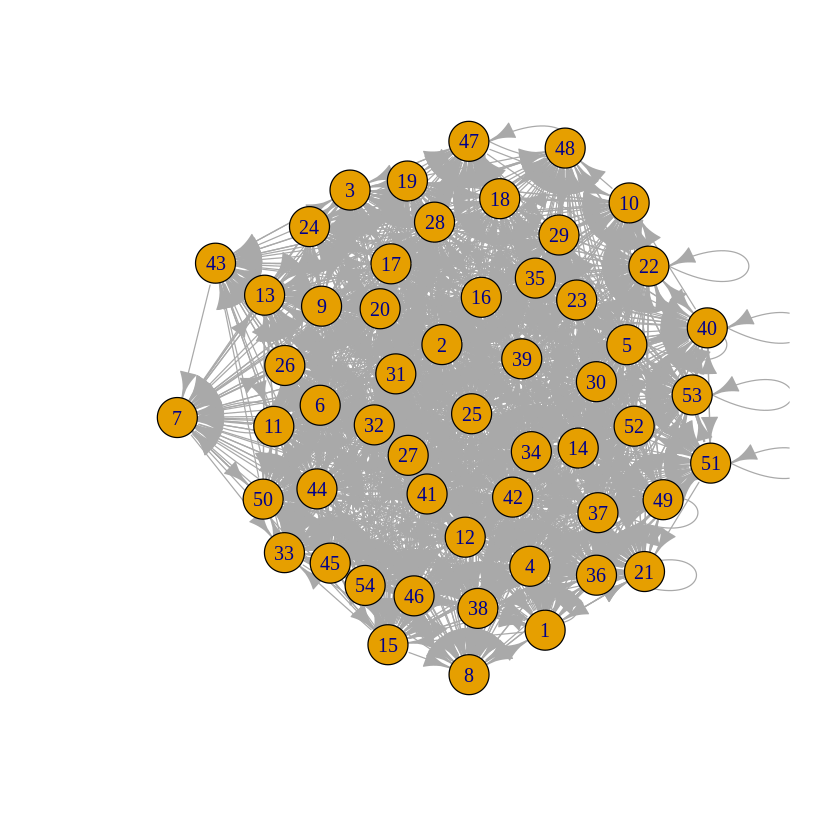

In [103]:
plot(graph, layout=layout.fruchterman.reingold) 

**№3** Вычислить «пятичисловую сводку» для графа Gd


In [102]:
net <-asNetwork(graph)
cat('Размер: ', network.size(net))
cat('\nПлотность: ', gden(net))
cat('\nКоличество компонент: ', components(net))
lgc <- component.largest(net, result = "graph")
gd <- geodist(lgc)
cat('\nДиаметр: ', max(gd$gdist))
cat('\nКоэффициент кластеризации:', gtrans(net, mode = "graph"))

Размер:  54
Плотность:  0.5450734
Количество компонент:  1
Диаметр:  2
Коэффициент кластеризации: 0.5464424

**№4** Вычислить цензус диад. Сделать выводы.

In [101]:
census <- dyad_census(graph)
census

$mut
[1] 418

$asym
[1] 724

$null
[1] 289

Вывод: наибольшее количество диад - ассиметричных(724), также имеется 418 полных диады и 289 нулевых диад.

**№5** Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [100]:
d<-g*p
fix_index <- (2*(g-1)*census$mut-g*d*d)/(g*d*(g-1-d))
cat("Фиксированный выбор: ", fix_index)

Фиксированный выбор:  -0.02308247

In [99]:
matr <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(matr))
L2 <- sum(rowSums(matr)^2)
free_index <- (2*(g-1)^2 * census$mut - L^2+L2)/(L*(g-1)^2-L^2+L2)
cat("Свободный выбор: ", free_index)

Свободный выбор:  -0.03890193

Вывод: так как индекс фиксированного выбора>индекс свободного выбора, то это показывает, что при фиксированном выборе акторы создают больше взаимных связей.

**№6** Вычислить вероятность того, что связь будет взаимной для каждого случая.


In [98]:
fix_mut <- (d/(g-1))*(d/(g-1)+fix_index*((g-1-d)/(g-1)));
cat("Вероятность для фиксированного выбора: ",fix_mut,"\n");
free_mut <- (rowSums(matr) * colSums(matr))/(g - 1)^2
free_mut <- sum(free_mut)/g
cat("Вероятность для свободного выбора:", free_mut, "\n")

Вероятность для фиксированного выбора:  0.2969951 
Вероятность для свободного выбора: 0.304893 


**№7** Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [97]:
f_function <- function(row_sums,t,g){
  xiplus <- sum(row_sums[1:t]);
  return (xiplus-t*(g-1)-choose(t,2));
}

g_function <- function(row_sums,t,g){
  sum_min = 0;
  for (i in (t+1):g){
    sum_min <- sum_min+min(c(t,row_sums[i]))
  }
  xiplus <- sum(row_sums[1:t])
  return (xiplus-t*(t-1)*sum_min);
}

row_sums <- rowSums(matr)

g_arr <- c(0:g)
f_arr <- c(0:g)
for (t in 0:(g-1)) {
    g_arr[t] <- g_function(row_sums, t, g)
    f_arr[t] <- f_function(row_sums, t, g)
}

M_max <- floor(0.5 * (sum(row_sums[1:g]) - max(g_res)))
M_min <- max(f_res)

Bindex <- (census$mut - M_min)/(M_max - M_min)
cat("Индекс взаимности Бандиопадхьяйя =",Bindex)

Индекс взаимности Бандиопадхьяйя = 0.56125

Вывод: полученный индекс взаимности практически равен, вероятности образования ребра p, которое мы использовали для генерации графа

**№8** Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [104]:
binom.test(length(E(graph)), g*(g - 1), p = 0.5,conf.level = 1-alpha)


	Exact binomial test

data:  length(E(graph)) and g * (g - 1)
number of successes = 1585, number of trials = 2862, p-value =
9.251e-09
alternative hypothesis: true probability of success is not equal to 0.5
98 percent confidence interval:
 0.5319550 0.5755123
sample estimates:
probability of success 
             0.5538085 


Максимальный уровень значимости, при котором нулевая гипотеза не отвергается - p-value = 9.251e-09;<br>
p-value>alpha/2 из чего следует, что гипотеза отвергается

**№9** Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.




In [105]:
binom.test(length(E(graph)), g*(g - 1), p = P0,conf.level = 1-alpha)


	Exact binomial test

data:  length(E(graph)) and g * (g - 1)
number of successes = 1585, number of trials = 2862, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.79
98 percent confidence interval:
 0.5319550 0.5755123
sample estimates:
probability of success 
             0.5538085 


Максимальный уровень значимости, при котором нулевая гипотеза не отвергается p-value = 2.2e-16;<br>
p-value>alpha/2 из чего следует, что гипотеза отвергается

**№10** Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.


In [22]:
P <- (sum(matr))/(g*(g-1))
#т.к. Функция Лапласа равна 0.49
z <- 2.34
Plower <- P - z*sqrt((p*(1-p))/(g*(g-1)))
Pupper <- P + z*sqrt((p*(1-p))/(g*(g-1)))
cat(Plower,"<",p,"<",Pupper)

0.5309603 < 0.54 < 0.5745603

Вывод: доверительный интервал построен верно, так как оценка параметра p попадает в него

## Выводы

При выполнении практической работы был сгенерирован граф с заданным количеством вершин и вероятностью появления ребра, он был рассмотрен и проанализирован, также были посчитаны индексы взаимности Каца-Пауэлла и Бандиопадхьяйя. Были проверены гипотезы о том, что количество дуг в графе имеет биномиальное распределение.